In [285]:
from icrawler.builtin import GoogleImageCrawler
import argparse

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import feature , io
import glob
import cv2
from PIL import Image
from skimage import color


### DATA COLLECTION

def get_files(directory, extensions=None, shuffle=False):
   
    if extensions is None:
        extensions =  ['jpg', 'bmp', 'png', 'JPG', 'JPEG','tif']
    images = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)

            if extensions is not None:
                if any(filepath.endswith(ext) for ext in extensions):
                    images.append(filepath)
            else:
                images.append(filepath)
    if shuffle:
        np.random.shuffle(images)
    return images

def write_files_to_file(directory, filename, shuffle=False):
    files = get_files(directory, shuffle=shuffle)
    file = open(filename, 'w')
    file.writelines('\n'.join(files))


def crawl_and_download(download_dir, keyword, filter_type, filename):
    try:
        filters = {'type': filter_type}
        google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
                                            storage={'root_dir': download_dir})
        google_crawler.crawl(keyword="bank check", max_num=100000,
                             min_size=(200, 200), max_size=(2500, 2500), filters=filters)
    finally:
        write_files_to_file(download_dir, filename)


def parse_args(args=None):
    parser = argparse.ArgumentParser()
    parser.add_argument("-d", "--download_dir", type=str, default="./downloads/", help="download directory")
    parser.add_argument("-k", "--keyword", type=str, default="face", help="search check Bank")
    parser.add_argument("-f", "--filename", type=str, default=None, help="file to save the list of downloaded files")
    parser.add_argument("-t", "--type", type=str, default='photo', help="Photo filter type [photo, face, clipart, "
                                                                        "linedrawing, animated]")
    args = parser.parse_args(args)
    if args.filename is None:
        args.filename = os.path.join(args.download_dir, "files.txt")
    return args


def demo():
    args = "-d download/ -k 'human+face' -t photo -f download/files.txt".split()
    args = parse_args(args)
    print("Downloading '{}' of type '{}' into the folder '{}'. Final list will be written to the file '{}'".format(
        args.keyword, args.type, args.download_dir, args.filename))
    crawl_and_download(args.download_dir, args.keyword, args.type, args.filename)


if __name__ == "__main__":
    args = parse_args()
    print("Downloading '{}' of type '{}' into the folder '{}'. Final list will be written to the file '{}'".format(
        args.keyword, args.type, args.download_dir, args.filename))
    crawl_and_download(args.download_dir, args.keyword, args.type, args.filename)

In [286]:
def display_img(img):
        fig=plt.figure(figsize=(20,20))
        ax=fig.add_subplot(111)
        plt.imshow(img)

### converting our images to jpeg

In [287]:
path = "C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/300/*"

for index, filename in enumerate(glob.glob(path)):
    a = cv2.imread(filename)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/jpeg/{index}.jpeg', a)


### resize all images

In [288]:
path = "C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/jpeg/*"
cheques = []
for index, filename in enumerate(glob.glob(path)):
    a = cv2.imread(filename)
    width = 2300
    height = 1100
    dim = (width, height)
    resized = cv2.resize(a, dim, interpolation = cv2.INTER_AREA)
    cheques.append(resized)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/DATA/{index}.jpeg',resized)

#### REMOVE NOISE

In [289]:
denoised_cheques=[]
for i in range(len(cheques)):
    denoised_cheques.append(None)
for i in range(len(cheques)):
    dst = cv2.fastNlMeansDenoisingColored(cheques[i], None, 10, 10, 21, 15)
    cheques[i]=dst
    denoised_cheques[i]=dst
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/DENOISE/{i}.jpeg',dst)    

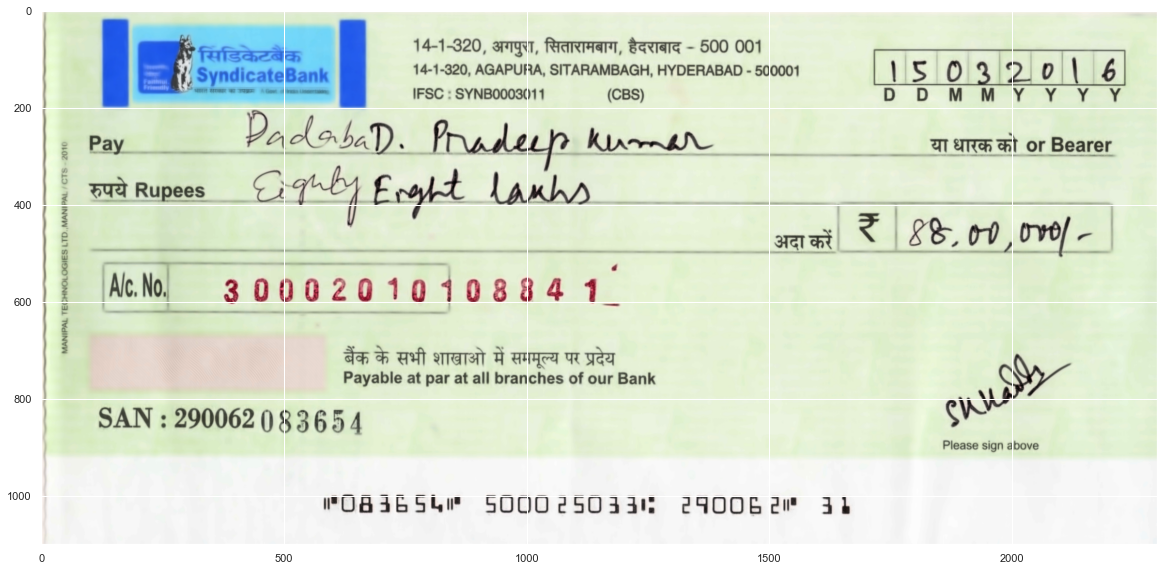

In [290]:
display_img(cheques[0])

### Grayscaling

In [291]:
def display_img_gray(img):
        fig=plt.figure(figsize=(20,20))
        ax=fig.add_subplot(111)
        ax.imshow(img,cmap='gray')

In [292]:
for i in range(len(cheques)):
    img=cv2.cvtColor(cheques[i],cv2.COLOR_RGB2GRAY)
    cheques[i]=img
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/GRAY/{i}.jpeg',img)

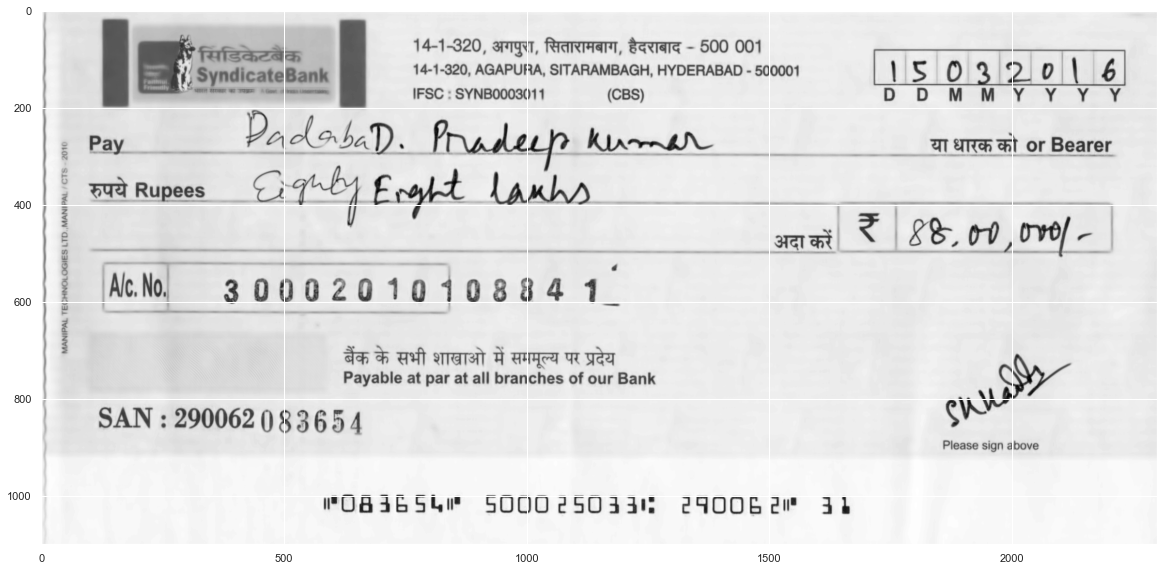

In [293]:
display_img_gray(cheques[0])

### gaussien filtring

In [294]:
for i in range(len(cheques)):
    blur = cv2.GaussianBlur(cheques[i], (3, 3), 5)
    cheques[i]=blur
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/GAUS/{i}.jpeg',blur)

In [295]:
print(len(cheques))

112


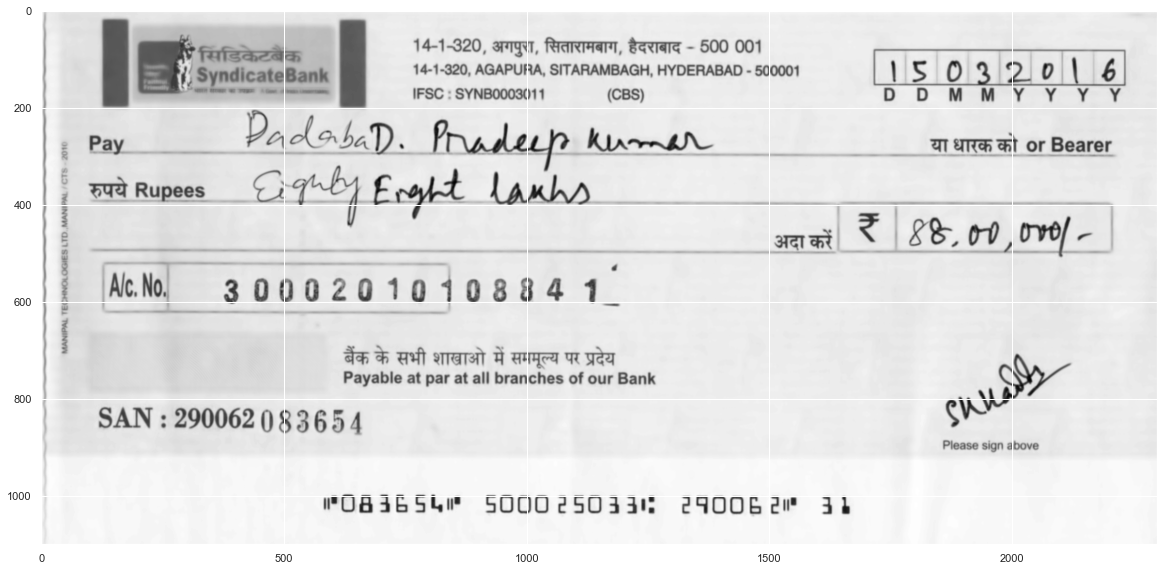

In [296]:
display_img_gray(cheques[0])

### BINARISATION

In [297]:
for i in range(len(cheques)):
    thresh = cv2.threshold(cheques[i], 128, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU )[1]
    cheques[i]=thresh
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/BIN/{i}.jpeg',thresh)

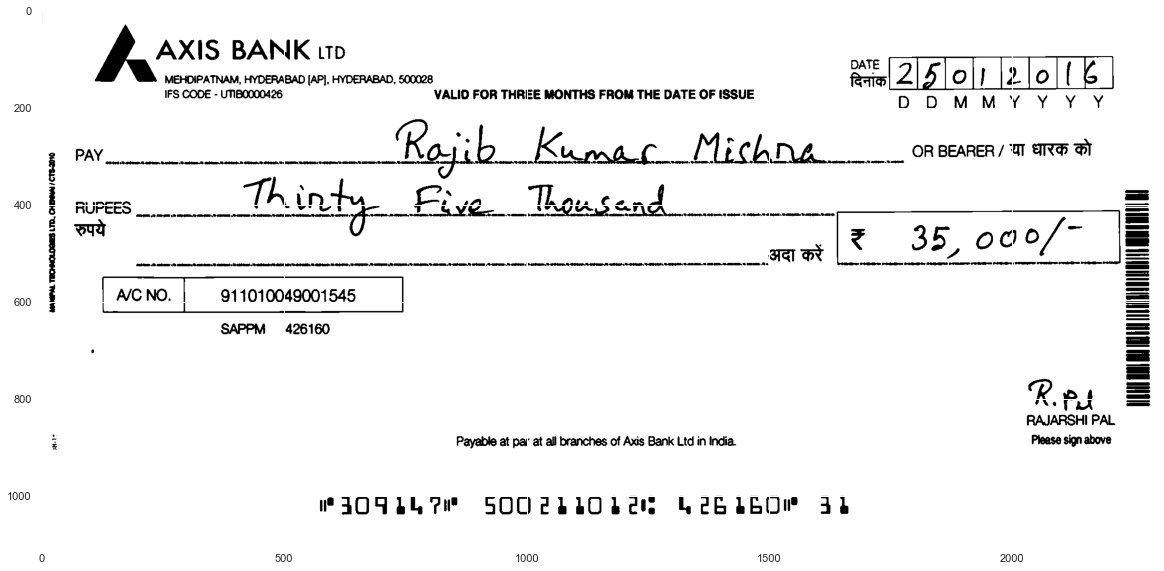

In [298]:
display_img_gray(cheques[3])

In [299]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import cv2 
import os
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import feature , io
import glob
from PIL import Image
from keras.backend import conv2d_transpose
import math
from numpy import asarray
import PIL
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
import cv2
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
sns.set(rc={'figure.figsize' : (22, 10)})
sns.set_style("darkgrid", {'axes.grid' : True})

In [300]:
from skimage.metrics import structural_similarity
import cv2

In [301]:
#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
    orb = cv2.ORB_create()

  # detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
    matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
    similar_regions = [i for i in matches if i.distance < 20]  
    if len(matches) == 0:
        return 0
    return len(similar_regions) / len(matches)

In [302]:
temp1 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/temp/CANARA.jpeg',0)

In [303]:
temp2 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/temp/AXIS.jpeg',0)

In [304]:
temp3 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/temp/SYNDICATE.jpeg',0)

In [305]:
temp4 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/temp/ICICI.jpeg',0)

In [306]:
df = pd.DataFrame(columns=['NUM_AC','NOM','MONTANT_letter','MICR','DATE','montant_chiffre','bank_name','valide'])

In [307]:
cleaned_cheques=[]
for i in range(len(cheques)):
    cleaned_cheques.append(None)
for i in range(len(cheques)):
    if (orb_sim(cheques[i], temp1) > orb_sim(cheques[i], temp2)) & (orb_sim(cheques[i], temp1) > orb_sim(cheques[i], temp3)) & (orb_sim(cheques[i], temp1) > orb_sim(cheques[i], temp4)):
        temp=temp1
        df2 = {'bank_name': 'CANARA'}
        df = df.append(df2, ignore_index = True)
    elif (orb_sim(cheques[i], temp2) > orb_sim(cheques[i], temp1)) & (orb_sim(cheques[i], temp2) > orb_sim(cheques[i], temp3)) & (orb_sim(cheques[i], temp2) > orb_sim(cheques[i], temp4)):
        temp=temp2
        df2 = {'bank_name': 'AXIS'}
        df = df.append(df2, ignore_index = True)
    elif (orb_sim(cheques[i], temp3) > orb_sim(cheques[i], temp2)) & (orb_sim(cheques[i], temp3) > orb_sim(cheques[i], temp1)) & (orb_sim(cheques[i], temp3) > orb_sim(cheques[i], temp4)):
        temp=temp3
        df2 = {'bank_name': 'SYNDICATE'}
        df = df.append(df2, ignore_index = True)
    else:
        temp=temp4
        df2 = {'bank_name': 'ICICI'}
        df = df.append(df2, ignore_index = True)
    #Allignement :
    MAX_FEATURES = 2000
    GOOD_MATCH_PERCENT = 0.3
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(cheques[i], None)
    keypoints2, descriptors2 = orb.detectAndCompute(temp, None)
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2)
    matches = sorted(matches, key = lambda x:x.distance)
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]
    imMatches = cv2.drawMatches(cheques[i], keypoints1, temp, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for k, match in enumerate(matches):
        points1[k, :] = keypoints1[match.queryIdx].pt
        points2[k, :] = keypoints2[match.trainIdx].pt
    h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
    height, width= temp.shape
    im1Reg = cv2.warpPerspective(temp, h, (width, height)) 
    #denoiseddd2 = cv2.fastNlMeansDenoisingColored(im1Reg, h = 20 )
    thhh2, im_thhh2 = cv2.threshold(im1Reg, 128, 255, cv2.THRESH_BINARY)
    cleaned_cheques[i] =  im_thhh2 - cheques[i]
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/CLEANED/{i}.jpeg',cleaned_cheques[i])
    

In [308]:
for i in range(len(cleaned_cheques)):
    cleaned_cheques[i] = cv2.medianBlur(cleaned_cheques[i],5)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/HANDWRITTEN/{i}.jpeg',cleaned_cheques[i])

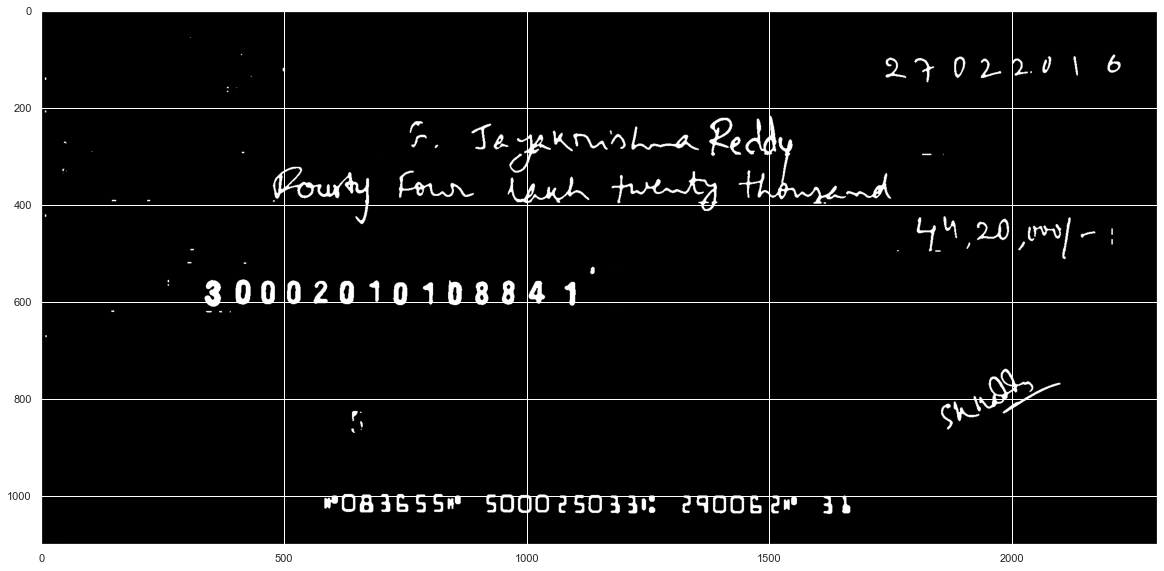

In [309]:
display_img_gray(cleaned_cheques[1])

### CROPPING

In [310]:
PAY=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][400:600,1600:2231]
    PAY.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/PAY/{i}.jpeg', x)

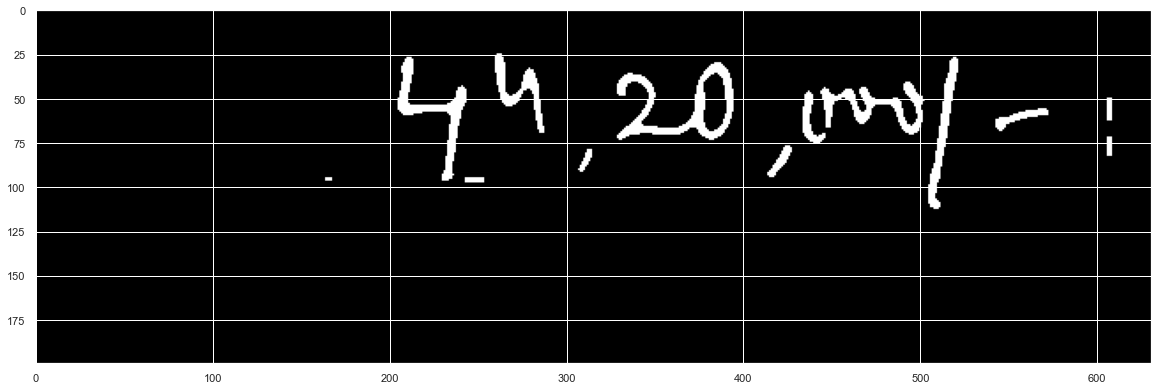

In [311]:
display_img_gray(PAY[1])

In [312]:
date=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][10:270,1700:2300]
    date.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/DATE/{i}.jpeg', x)

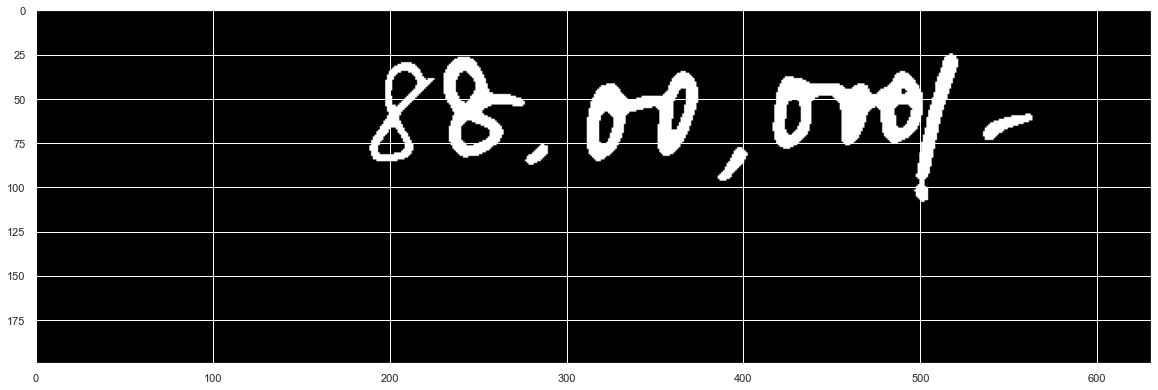

In [313]:
display_img_gray(PAY[0])

In [314]:
RUPPEES=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][270:480,168:1930]#[115:320,77:810] [177]
    RUPPEES.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/PAY_ONLY/{i}.jpeg', x)

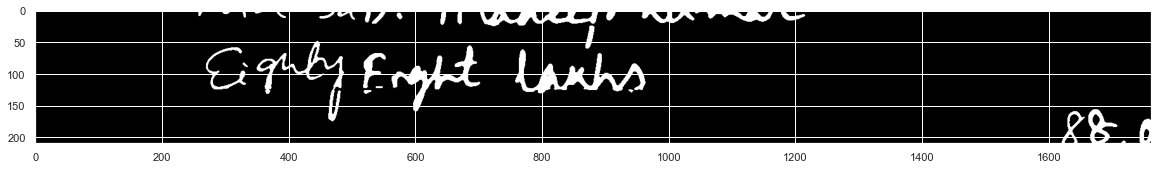

In [315]:
display_img_gray(RUPPEES[0])

In [316]:
NAME=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][183:360,168:1930]#[115:320,77:810] [177]
    NAME.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/NAME_ONLY/{i}.jpeg', x)

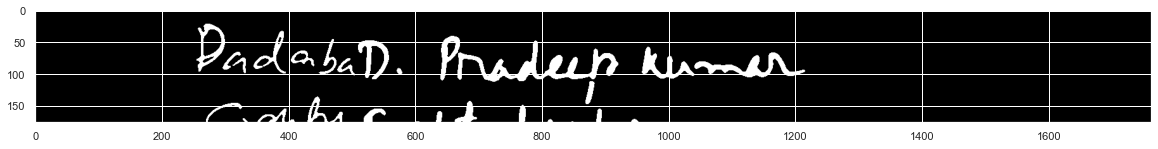

In [317]:
display_img_gray(NAME[0])

In [318]:
sig=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][573:974, 1714:2300]
    sig.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/SIG/{i}.jpeg', x)

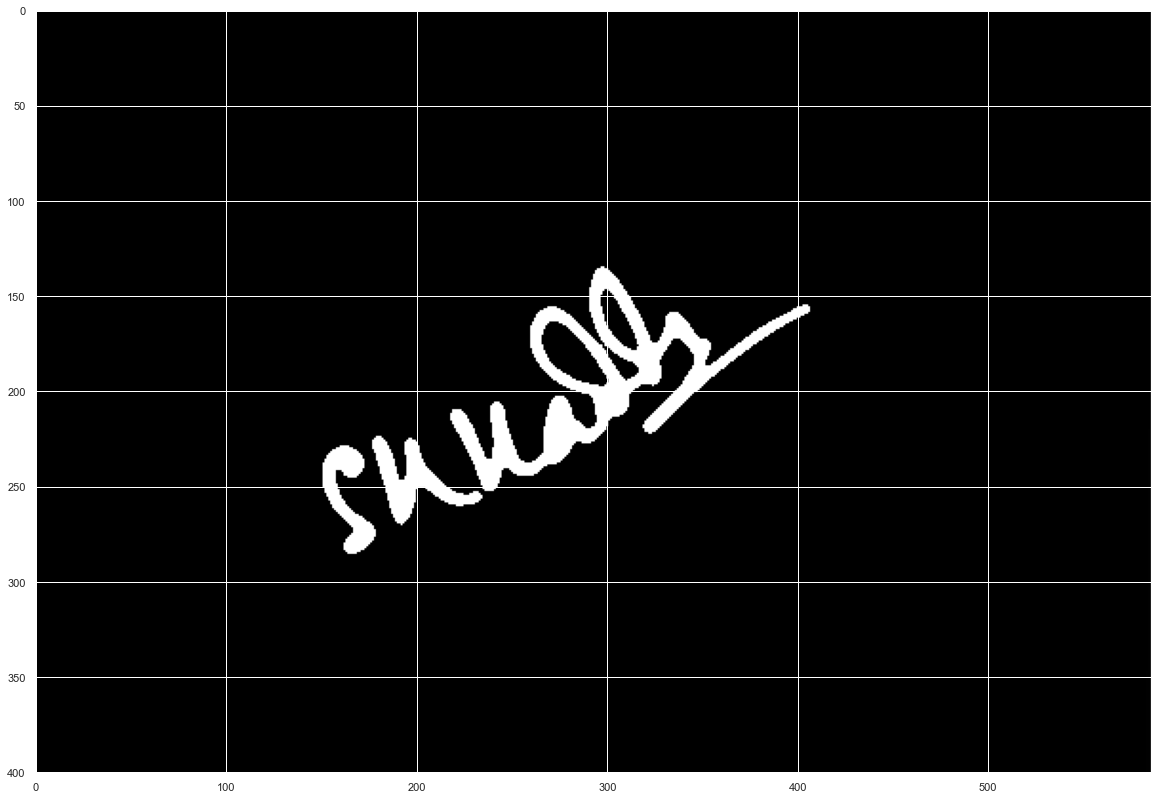

In [319]:
display_img_gray(sig[0])

In [320]:
micr=[]
for i in range(len(cleaned_cheques)):
    x=cleaned_cheques[i][919:1241, 198:1840]
    micr.append(x)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/MICR/{i}.jpeg', x)

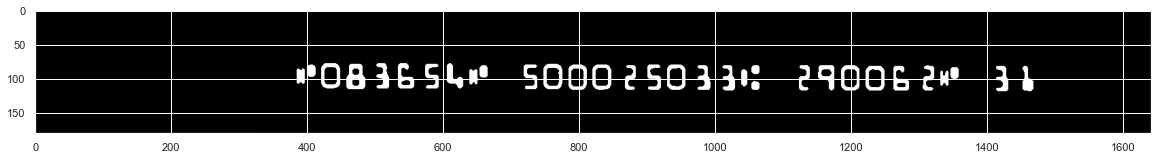

In [321]:
display_img_gray(micr[0])

In [322]:
for i in range(len(NAME)):
    cnts = cv2.findContours(NAME[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        if  172 < y+h :
            NAME[i][y:y + h, x:x + w] = 0
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/NAME_ONLY/{i}.jpeg', NAME[i])

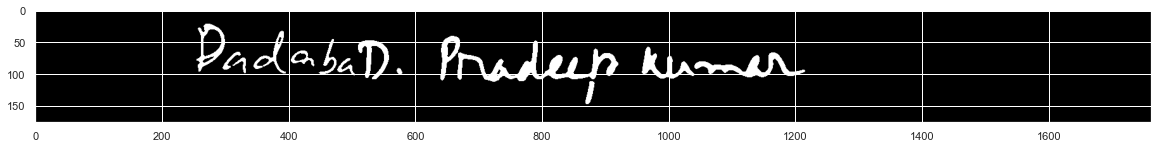

In [323]:
display_img_gray(NAME[0])

In [324]:
num_ac=[]
for i in range(len(cleaned_cheques)):
    num=cleaned_cheques[i][490:780,215:1300]
    cnts = cv2.findContours(num, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    rect_areas=[]
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        rect_areas.append(w * h)
        avg_area = np.mean(rect_areas)

    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        cnt_area = w * h
        if cnt_area < 0.2 * avg_area:
            num[y:y + h, x:x + w] = 0
    num_ac.append(num)
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/NUM/{i}.jpeg', num)

### Train a CNN Model with mnist to predit digits

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from keras import layers

In [4]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [5]:
input_shape = (28,28,1)
output_class = 10

In [6]:
model_cnn = Sequential()
model_cnn.add(Conv2D(25,(3, 3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)

In [7]:
model_cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train_images_cnn = trainX.reshape(60000, 28, 28, 1)

In [9]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [10]:
test_images_cnn = testX.reshape(10000, 28, 28, 1)

In [11]:
test_images_cnn = test_images_cnn.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_labels_cnn = to_categorical(trainy)

In [14]:
test_labels_cnn = to_categorical(testy)

In [15]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
1000/1000 [==============================] - 25s 24ms/step - loss: 0.3005 - accuracy: 0.9043
Epoch 2/5
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0878 - accuracy: 0.9732
Epoch 3/5
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0653 - accuracy: 0.9792
Epoch 4/5
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 5/5
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0424 - accuracy: 0.9868


In [16]:
model_cnn.save("digits.h5")

In [18]:
from tensorflow import keras

In [19]:
new_model = keras.models.load_model("digits.h5")

In [340]:
#defining a function to sort contours
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [341]:
j=0
for i in range(len(date)):
    cnts = cv2.findContours(date[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts=sorted(cnts,key=lambda x:cv2.boundingRect(x)[0])
    (cnts, boundingBoxes) = sort_contours(cnts, method="left-to-right")
    roi=[]
    for l in range(len(cnts)):
        roi.append(0)
    rect_areas=[]

    k=0
    n=[]
    number=""
    area=0
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c) 
        TP= w * h
        white= TP - cv2.countNonZero(date[i][y:y+h,x:x+w])
        if(white>TP/5):
            if (h>25):
                roi[k]=date[i][y:y+h,x:x+w] 
                a=roi[k]
                roi[k] = cv2.resize(roi[k], (28, 28))
                roi[k] = roi[k].astype('float32')
                roi[k] = roi[k].reshape(1, 28, 28, 1)
                roi[k] /= 255
                number+=str(model_cnn.predict(roi[k]).argmax())
                k=k+1
                j=j+1
            
    df.at[i, 'DATE'] = number

In [342]:
df

,NUM_AC,NOM,MONTANT_letter,MICR,DATE,montant_chiffre,bank_name,valide
0,NaN,NaN,NaN,NaN,65032068,NaN,SYNDICATE,NaN
1,NaN,NaN,NaN,NaN,23012735,NaN,SYNDICATE,NaN
2,NaN,NaN,NaN,NaN,35022086,NaN,ICICI,NaN
3,NaN,NaN,NaN,NaN,25002001,NaN,AXIS,NaN
4,NaN,NaN,NaN,NaN,25002606,NaN,AXIS,NaN
...,...,...,...,...,...,...,...,...
107,NaN,NaN,NaN,NaN,256022,NaN,AXIS,NaN
108,NaN,NaN,NaN,NaN,250206,NaN,AXIS,NaN
109,NaN,NaN,NaN,NaN,25002060,NaN,AXIS,NaN
110,NaN,NaN,NaN,NaN,25002006,NaN,AXIS,NaN


## small contours

In [343]:
for i in range(len(PAY)):
    cnts = cv2.findContours(PAY[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    rect_areas=[]
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        rect_areas.append(w * h)
        avg_area = np.mean(rect_areas)

    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        cnt_area = w * h
        if cnt_area < 0.3 * avg_area:
                PAY[i][y:y + h, x:x + w] = 0

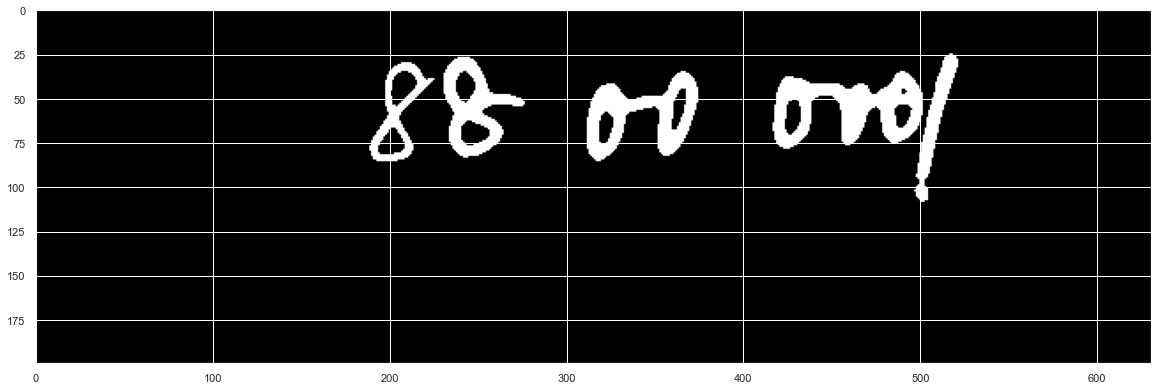

In [344]:
display_img_gray(PAY[0])

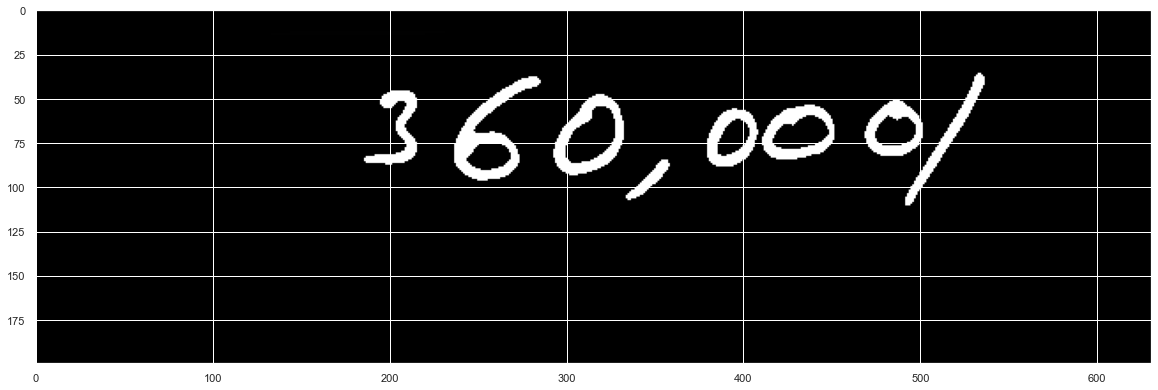

In [346]:
display_img_gray(PAY[4])

In [347]:
for i in range(len(PAY)):
    cnts = cv2.findContours(PAY[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts=sorted(cnts,key=lambda x:cv2.boundingRect(x)[0])
    roi=[]
    for l in range(len(cnts)):
        roi.append(0)
    rect_areas=[]

    k=0
    n=[]
    number=""
    area=0
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c) 
        if (h>30)&(w>10):
            roi[k]=PAY[i][y:y+h,x:x+w] 
            #print(i)
            roi[k] = cv2.resize(roi[k], (28, 28))
            roi[k] = roi[k].astype('float32')
            roi[k]=roi[k].reshape(1, 28, 28, 1)
            roi[k] /= 255
            number+=str(model_cnn.predict(roi[k]).argmax())
            k=k+1
    df.at[i, 'montant_chiffre'] = number

In [348]:
df

,NUM_AC,NOM,MONTANT_letter,MICR,DATE,montant_chiffre,bank_name,valide
0,NaN,NaN,NaN,NaN,65032068,86780,SYNDICATE,NaN
1,NaN,NaN,NaN,NaN,23012735,7471,SYNDICATE,NaN
2,NaN,NaN,NaN,NaN,35022086,22308,ICICI,NaN
3,NaN,NaN,NaN,NaN,25002001,350001,AXIS,NaN
4,NaN,NaN,NaN,NaN,25002606,1600004,AXIS,NaN
...,...,...,...,...,...,...,...,...
107,NaN,NaN,NaN,NaN,256022,026001,AXIS,NaN
108,NaN,NaN,NaN,NaN,250206,6601,AXIS,NaN
109,NaN,NaN,NaN,NaN,25002060,601,AXIS,NaN
110,NaN,NaN,NaN,NaN,25002006,21600001,AXIS,NaN


### we will use PYTESSERACT to predict handwritten letters , acount number and micr

In [349]:
import pytesseract as py

In [350]:
py.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [351]:
for i in range(len(num_ac)):
    str_num_ac=py.image_to_string(num_ac[i],config="--psm 7 -c tessedit_char_whitelist=0123456789" )
    str_num_ac = str_num_ac.rstrip()
    str_nom=py.image_to_string(NAME[i],config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz " )
    str_nom = str_nom.rstrip()
    str_micr=py.image_to_string(micr[i], lang = 'mcr')
    str_micr = str_micr.rstrip()
    df.at[i, 'NUM_AC'] = str_num_ac
    df.at[i, 'NOM'] = str_nom
    df.at[i, 'MICR'] = str_micr
    df.at[i, 'valide'] = 1


In [352]:
df

,NUM_AC,NOM,MONTANT_letter,MICR,DATE,montant_chiffre,bank_name,valide
0,30002010108841,DadoabeD PrsdeneKireir,NaN,c083654d0 50002503302 290062100 31,65032068,86780,SYNDICATE,1
1,30002010108841,r Tegakrnla Pedd,NaN,0000836500 50002503302 290062000 31,23012735,7471,SYNDICATE,1
2,630801551452,Rawuse ACOA OLA were,NaN,00010083180 50022900905 55145280 31,35022086,22308,ICICI,1
3,911010049001545,Kosi L Kuma Michna,NaN,c309147d0 50021101205 426160c 31,25002001,350001,AXIS,1
4,911010049001545,Rowata Rej ib Kummer,NaN,00030914880 50021101205 42616080 31,25002606,1600004,AXIS,1
...,...,...,...,...,...,...,...,...
107,911010049001545,Kumoy Vinay Sinah,NaN,c309139c 50021101205 426160c 31,256022,026001,AXIS,1
108,911010049001545,Anivben Shanma,NaN,0003091410c 50021101205 426160100 31,250206,6601,AXIS,1
109,911010049001545,Somana banks Rahul Sing h,NaN,c309142c 50021101205 426160008 31,25002060,601,AXIS,1
110,911010049001545,TRakeshKumor,NaN,180309144000 50021101205 42616080 31,25002006,21600001,AXIS,1


In [353]:
for i in range(len(RUPPEES)):
    cnts = cv2.findContours(RUPPEES[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        if   (y<=25)|((130<y+h) & (1550<x+w )):
            RUPPEES[i][y:y + h, x:x + w] = 0
    cv2.imwrite(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/PAY_ONLY/{i}.jpeg', RUPPEES[i])

In [355]:
for i in range(len(RUPPEES)):
    str_montant=py.image_to_string(RUPPEES[i],config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz " )
    str_montant = str_montant.rstrip()
    df.at[i, 'MONTANT_letter'] = str_montant

In [356]:
df

,NUM_AC,NOM,MONTANT_letter,MICR,DATE,montant_chiffre,bank_name,valide
0,30002010108841,DadoabeD PrsdeneKireir,and yh LAK,c083654d0 50002503302 290062100 31,65032068,86780,SYNDICATE,1
1,30002010108841,r Tegakrnla Pedd,oy PRA Tween TRYALAM,0000836500 50002503302 290062000 31,23012735,7471,SYNDICATE,1
2,630801551452,Rawuse ACOA OLA were,Iweddy JinAAKRA TR KVeTAVWew,00010083180 50022900905 55145280 31,35022086,22308,ICICI,1
3,911010049001545,Kosi L Kuma Michna,Aint Five Thousand,c309147d0 50021101205 426160c 31,25002001,350001,AXIS,1
4,911010049001545,Rowata Rej ib Kummer,ThreeCashy Sly Thousand,00030914880 50021101205 42616080 31,25002606,1600004,AXIS,1
...,...,...,...,...,...,...,...,...
107,911010049001545,Kumoy Vinay Sinah,Tends Haree theatre Hundved,c309139c 50021101205 426160c 31,256022,026001,AXIS,1
108,911010049001545,Anivben Shanma,UnedLAKKlenbhousand,0003091410c 50021101205 426160100 31,250206,6601,AXIS,1
109,911010049001545,Somana banks Rahul Sing h,ne ask lon thousand,c309142c 50021101205 426160008 31,25002060,601,AXIS,1
110,911010049001545,TRakeshKumor,lwo lakh Sixty TharaSa aa,180309144000 50021101205 42616080 31,25002006,21600001,AXIS,1


In [257]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
import seaborn as sns
from shutil import copy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
import os
import cv2

np.random.seed(42)

DATA_DIR = "Dataset_Signature_Final/Dataset"

# <u>The Dataset</u>
- We will be using the handwritten signatures dataset from Kaggle. (https://www.kaggle.com/divyanshrai/handwritten-signatures)
- Like any project, we will first start by exploring and loading the data.

In [6]:
def load_data(DATA_DIR=DATA_DIR, test_size=0.2, verbose=True, load_grayscale=True):
    """
        Loads the data into a dataframe.
        
        Arguments:
            DATA_DIR: str
            test_size: float
        Returns:
            (x_train, y_train,x_test, y_test, x_val, y_val, df)
    """
    features = []
    features_forged = []
    features_real = []
    features_dict = {}
    labels = [] # forged: 0 and real: 1
    mode = "rgb"
    if load_grayscale:
        mode = "grayscale"
    
    for folder in os.listdir(DATA_DIR):
        # forged images
        if folder == '.DS_Store' or folder == '.ipynb_checkpoints':
            continue
        print ("Searching folder {}".format(folder))
        for sub in os.listdir(DATA_DIR+"/"+folder+"/forge"):
            f = DATA_DIR+"/"+folder+"/forge/" + sub
            img = load_img(f,color_mode=mode, target_size=(150,150))
            features.append(img_to_array(img))
            features_dict[sub] = (img, 0)
            features_forged.append(img)
            if verbose:
                print ("Adding {} with label 0".format(f))
            labels.append(0) # forged
        # real images
        for sub in os.listdir(DATA_DIR+"/"+folder+"/real"):
            f = DATA_DIR+"/"+folder+"/real/" + sub
            img = load_img(f,color_mode=mode, target_size=(150,150))
            features.append(img_to_array(img))
            features_dict[sub] = (img, 1)
            features_real.append(img)
            if verbose:
                print ("Adding {} with label 1".format(f))
            labels.append(1) # real
            
    features = np.array(features)
    labels = np.array(labels)
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
    
    print ("Generated data.")
    return features, labels,features_forged, features_real,features_dict,x_train, x_test, y_train, y_test, x_val, y_val


def convert_label_to_text(label=0):
    """
        Convert label into text
        
        Arguments:
            label: int
        Returns:
            str: The mapping
    """
    return "Forged" if label == 0 else "Real"

In [7]:
features, labels,features_forged, features_real, features_dict,x_train, x_test, y_train, y_test, x_val, y_val = load_data(verbose=False, load_grayscale=False)

Searching folder dataset1
Searching folder dataset2
Searching folder dataset3
Searching folder dataset4
Generated data.


- We extract all the data in the respective variables where 0 label stands for forged and 1 stands for real.
- The images are loaded with as channels as 1 (grayscale)

# <u>Visualization of the data</u>
- Let us get a closer look at the data.

Distribution: [360 360]


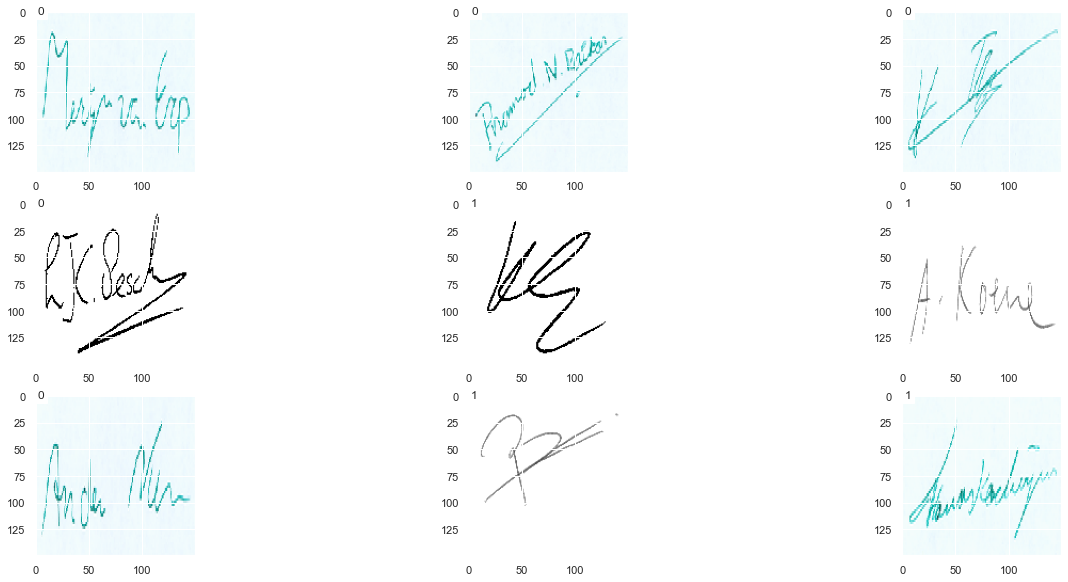

In [8]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(features[0]/255.)
axarr[0,0].text(2, 2, labels[0], bbox={'facecolor': 'white', 'pad': 3})
axarr[0,1].imshow(features[1]/255.)
axarr[0,1].text(2, 2, labels[1], bbox={'facecolor': 'white', 'pad': 3})
axarr[0,2].imshow(features[2]/255.)
axarr[0,2].text(2, 2, labels[2], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,0].imshow(features[300]/255.)
axarr[1,0].text(2, 2, labels[300], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,1].imshow(features[400]/255.)
axarr[1,1].text(2, 2, labels[400], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,2].imshow(features[512]/255.)
axarr[1,2].text(2, 2, labels[512], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,0].imshow(features[6]/255.)
axarr[2,0].text(2, 2, labels[6], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,1].imshow(features[200]/255.)
axarr[2,1].text(2, 2, labels[200], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,2].imshow(features[100]/255.)
axarr[2,2].text(2, 2, labels[100], bbox={'facecolor': 'white', 'pad': 3})

print ("Distribution: {}".format(np.bincount(labels)))

- Here we show some snapshots of the signatures.
- The distribution of the data is uniform as we have 360 as forged and 360 images as real.
- 0 represents forged and 1 represents real
- The images are loaded with a target_size of (150,150)

# <u>Approach #1: Similarity in images (signatures) using  Structural similarity.</u>
<p>
    To compute similarity between images we can use <b>SSIM(Structural similarity)</b>. fortunately scikit-learn provides an implmenetation for SSIM.
</p>


In [14]:
def ssim(A, B):
    """
        Computes SSIM between two images.
        
        Arguments:
            A: numpy array
            B: numpy array
            
        Returns:
            score: float
    """
    
    return structural_similarity(A, B)
     

### Here we take two images from the same person, one of them is real and the other is a fake.
- We will try to compute the similarity between these two images.

In [15]:
A = features_dict["02100002.png"] # 2 by 21 person
B = features_dict["00200002.png"] # 2 by 2 [real]

Signature: Forged


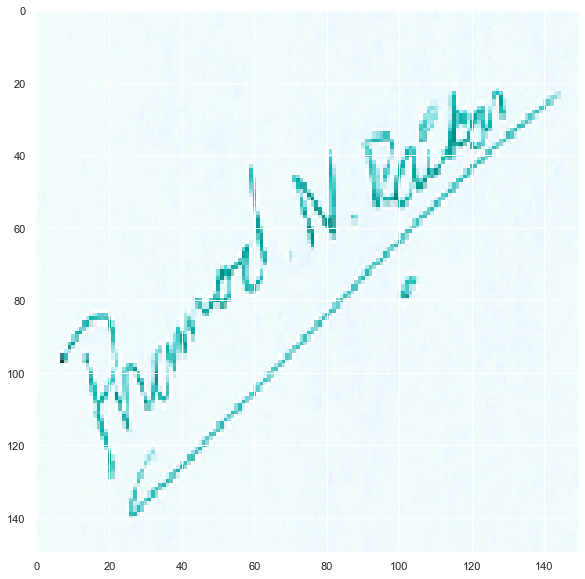

In [16]:
print ("Signature: {}".format(convert_label_to_text(A[1])))
plt.imshow(A[0])

Signature: Real


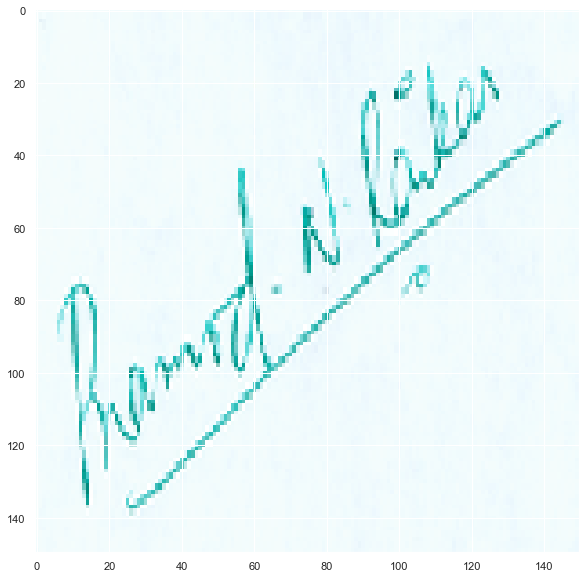

In [17]:
print ("Signature: {}".format(convert_label_to_text(B[1])))
plt.imshow(B[0])

In [18]:
A_array = img_to_array(A[0])
B_array = img_to_array(B[0])
print("SSIM: {}".format(ssim(A_array.flatten(),B_array.flatten())))

SSIM: 0.8162866467749774


# <u>Approach #2: Building a classifier using CNNs and transfert learning that can detect forged or real signatures.</u>
<p>
    With this approach, we will try to come up with a classifier (using CNNs) to detect forged or real signatures.<br>
    As CNNs are known to detect intricate features among images, we will experiment with a this classifier.
</p>

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [12]:
# normalize inputs
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
14/14 [==============================] - 8s 524ms/step - loss: 0.8110 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.4861
Epoch 2/5
14/14 [==============================] - 7s 482ms/step - loss: 0.6919 - acc: 0.5463 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 3/5
14/14 [==============================] - 7s 505ms/step - loss: 0.6888 - acc: 0.5625 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 4/5
14/14 [==============================] - 7s 514ms/step - loss: 0.6592 - acc: 0.6111 - val_loss: 0.6669 - val_acc: 0.6736
Epoch 5/5
14/14 [==============================] - 7s 534ms/step - loss: 0.5655 - acc: 0.7083 - val_loss: 0.6201 - val_acc: 0.7361


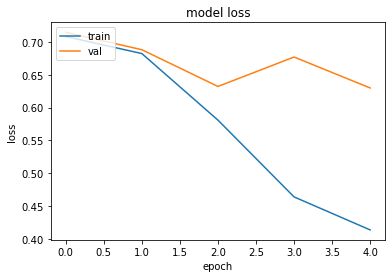

In [14]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_history(history)

- Model is clearly overfitting (one probable reason is the lack of training data.)
- On increasing the epochs, the model is clearly overfitting

## <u>Transfer Learning using Inception.</u>

In [15]:
# loading Inception
model2 = tf.keras.applications.InceptionV3(include_top=False, input_shape=(150,150,3))

In [16]:
# freezing layers
for layer in model2.layers:
    layer.trainable=False

In [17]:
# getting mixed7 layer
l = model2.get_layer("mixed7")

In [18]:
print ("mixed7 shape: {}".format(l.output_shape))

mixed7 shape: (None, 7, 7, 768)


In [19]:
x = tf.keras.layers.Flatten()(l.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(.5)(x)                  
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           
net = tf.keras.Model(model2.input, x) 

In [20]:
net.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

In [21]:
h2 = net.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5)

Epoch 1/5
14/14 [==============================] - 12s 684ms/step - loss: 3.2599 - acc: 0.5347 - val_loss: 0.8233 - val_acc: 0.7292
Epoch 2/5
14/14 [==============================] - 8s 582ms/step - loss: 0.8640 - acc: 0.7454 - val_loss: 0.6170 - val_acc: 0.7639
Epoch 3/5
14/14 [==============================] - 8s 582ms/step - loss: 0.3244 - acc: 0.8773 - val_loss: 0.4705 - val_acc: 0.8125
Epoch 4/5
14/14 [==============================] - 8s 595ms/step - loss: 0.2065 - acc: 0.9282 - val_loss: 0.3794 - val_acc: 0.7986
Epoch 5/5
14/14 [==============================] - 8s 590ms/step - loss: 0.0901 - acc: 0.9676 - val_loss: 0.3789 - val_acc: 0.8472


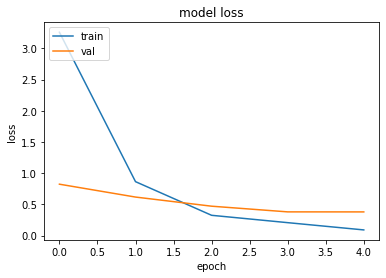

In [22]:
plot_history(h2)

- Clearly the model overfits after 3 epochs.
- But the result is still better than the previous one.

In [23]:
preds = net.predict(x_test)
pred_labels = []

In [24]:
# threshold is 0.5
for p in preds:
    if p >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
pred_labels = np.array(pred_labels)

In [25]:
print ("Accuracy on test set: {}".format(accuracy_score(y_test, pred_labels)))

Accuracy on test set: 0.9097222222222222


<p>
    These two approaches show that if we use transfer learning, we get much better results than using a plain CNN model.
    Keep in mind, these approaches do not learn the similarity function but these focus on the classifying whether the image in forged or real. There are still many ways we can improve our model, one is by augmenting data.
</p>

### With our third approach, we will try to learn the similarity function. We will use something called Siamese networks (due to nature of our data i.e less number of training examples)

# <u>Approach #3: Siamese networks for image similarity</u>


In this approach, we will use Siamese networks to learn the similarity function. It’s used to find similarities between inputs by comparing its feature vectors. he try to learn the approximate the similarity function instead of trying to classify. Its perform well for certain problems like face recognition and signature verification.

In [26]:
# the NN is the diagram
feature_vector = tf.keras.Sequential()
feature_vector.add(tf.keras.layers.Conv2D(64,3, activation='relu', input_shape=(150,150,3)))
feature_vector.add(tf.keras.layers.BatchNormalization())
feature_vector.add(tf.keras.layers.Conv2D(32,3, activation='relu'))
feature_vector.add(tf.keras.layers.BatchNormalization())
feature_vector.add(tf.keras.layers.Conv2D(16, 3,activation='relu'))
feature_vector.add(tf.keras.layers.MaxPool2D((2,2)))
feature_vector.add(tf.keras.layers.Flatten())
feature_vector.add(tf.keras.layers.Dropout(0.2))
feature_vector.add(tf.keras.layers.Dense(512, activation='relu'))

In [27]:
feature_vector.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_94 (Bat  (None, 148, 148, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_99 (Conv2D)          (None, 146, 146, 32)      18464     
                                                                 
 batch_normalization_95 (Bat  (None, 146, 146, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_100 (Conv2D)         (None, 144, 144, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 72, 72, 16)      

In [28]:
# creating the siamese network
im_a = tf.keras.layers.Input(shape=(150,150,3))
im_b = tf.keras.layers.Input(shape=(150,150,3))

encoded_a = feature_vector(im_a)
encoded_b = feature_vector(im_b)
combined = tf.keras.layers.concatenate([encoded_a, encoded_b], axis=1)
combined = tf.keras.layers.BatchNormalization()(combined)
combined = tf.keras.layers.Dense(4, activation = 'linear')(combined)
combined = tf.keras.layers.BatchNormalization()(combined)
combined = tf.keras.layers.Activation('relu')(combined)
combined = tf.keras.layers.Dense(1, activation = 'sigmoid')(combined)

sm = tf.keras.Model(inputs=[im_a, im_b], outputs=[combined])
sm.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 512)          42493104    ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [29]:
sm.compile(optimizer='adam', loss = 'binary_crossentropy')

# <u>Dataset Generation</u>
<p>
    To generate the required dataset, We will generate data in pairs in the form (im_a, im_b, label) If two images have the same structure then the label it will be 1 . if not it will be 0.
</p>

In [33]:
def generate_data(person_number="001"):
    x = list(features_dict.keys())
    im_r = []
    im_f = []
    labels = [] # represents 1 if signature is real else 0
    for i in x:
        if i.startswith(person_number):
            if i.endswith("{}.png".format(person_number)):
                im_r.append(i)
                labels.append(1)
            else:
                im_f.append(i)
                labels.append(0)
    return im_r, im_f, labels


def generate_dataset_approach_two(size=100, test_size=0.25):
    """
        Generate data using the second approach.
        Remember input and output must be the same size!
        
        Arguments:
            features: numpy array
            labels: numpy array
            size: the target size (length of the array)
        Returns:
            x_train, y_train
    """
    im_r = []
    im_f = []
    ls = []

    ids = ["001","002","003",'004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022',
           '023','024','025','026','027','028','029','030']
    
    for i in ids:
        imr, imf, labels = generate_data(i)
        
        # similar batch
        for i in imr:
            for j in imr:
                im_r.append(img_to_array(features_dict[i][0]))
                im_f.append(img_to_array(features_dict[j][0]))
                ls.append(1) # they are similar
        
        # not similar batch
        for k in imf:
            for l in imf:
                im_r.append(img_to_array(features_dict[k][0]))
                im_f.append(img_to_array(features_dict[l][0]))
                ls.append(0) # they are not similar
    
    print(len(im_r), len(im_f))
    pairs = np.stack([im_r, im_f], axis=1)
    ls = np.array(ls)
    
    x_train, x_test, y_train, y_test = train_test_split(pairs, ls, test_size=test_size, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
    return x_train, y_train, x_test, y_test, x_val, y_val, pairs, ls    
        

In [34]:
x_train, y_train, x_test, y_test, x_val, y_val, pairs, ls = generate_dataset_approach_two()

10781 10781


- Now we have the dataset generated. We will train the network.

In [35]:
sm.fit([x_train[:,0], x_train[:,1]], y_train, epochs=1, validation_data=([x_val[:,0], x_val[:,1]], y_val))

190/190 [==============================] - 768s 4s/step - loss: 0.6964 - mae: 0.4930 - val_loss: 1.6983 - val_mae: 0.7728


In [421]:
pred=sm.predict([x_test[:,0], x_test[:,1]])

In [422]:
y_pred = (pred > 0.5)

In [423]:
from sklearn.metrics import confusion_matrix

In [424]:
confusion_matrix(y_test, y_pred)

array([[2458,    1],
       [   0,  237]], dtype=int64)

In [855]:
sig1 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/SIG/16.jpeg')

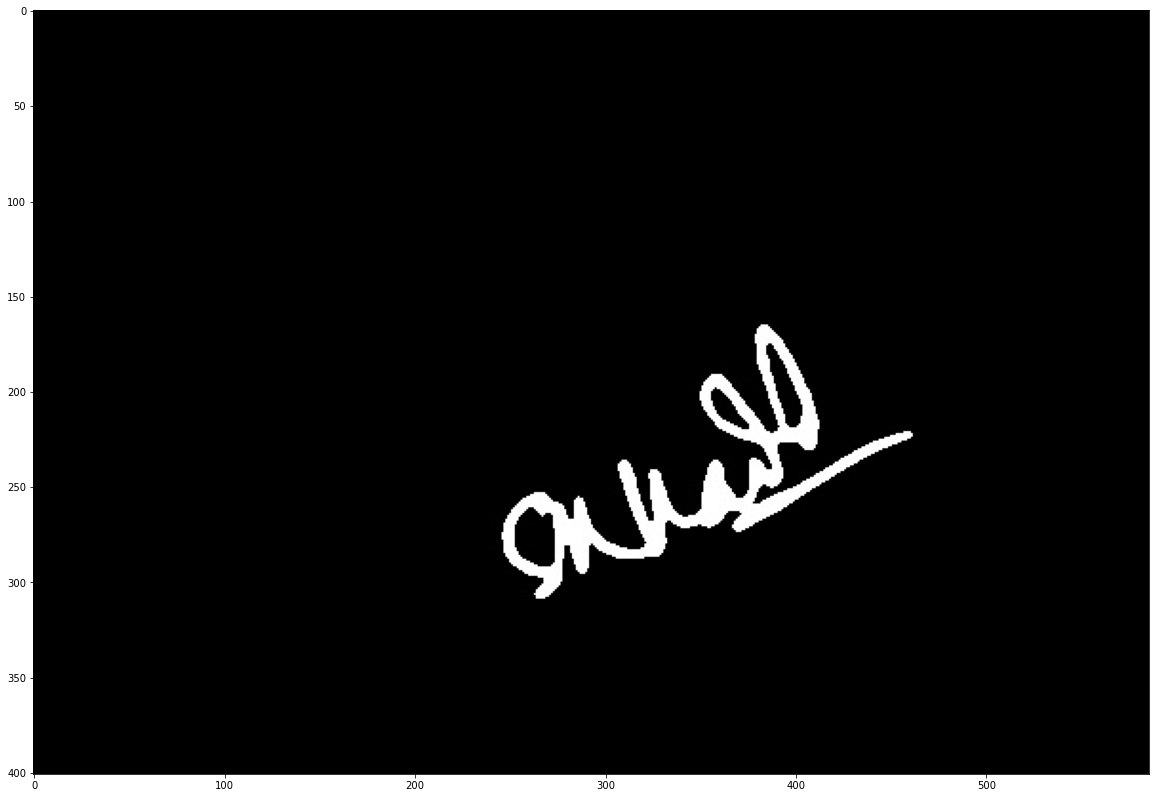

In [856]:
display_img_gray(sig1)

In [857]:
sig2 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/SIG/101.jpeg')

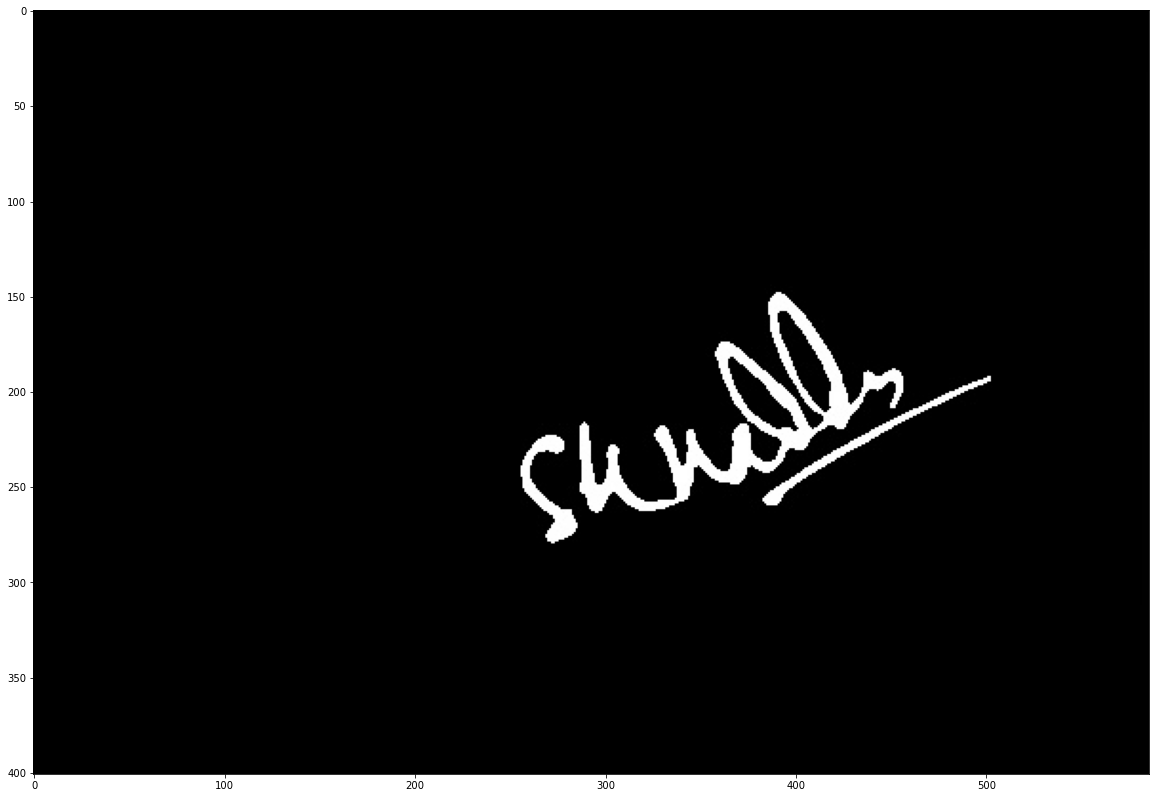

In [858]:
display_img_gray(sig2)

In [859]:
sig1 = cv2.resize(sig1, (150,150),interpolation=cv2.INTER_NEAREST)

In [860]:
sig1=tf.expand_dims(sig1, axis=0)

In [861]:
sig2 = cv2.resize(sig2, (150,150),interpolation=cv2.INTER_NEAREST)

In [862]:
sig2=tf.expand_dims(sig2, axis=0)

In [874]:
sm.predict([sig1,sig2])

array([[0.7163191]], dtype=float32)

In [873]:
sm.predict([sig1,sig2])>0.65

array([[ True]])

In [1097]:
sig3 = cv2.imread('C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/SIG/75.jpeg')

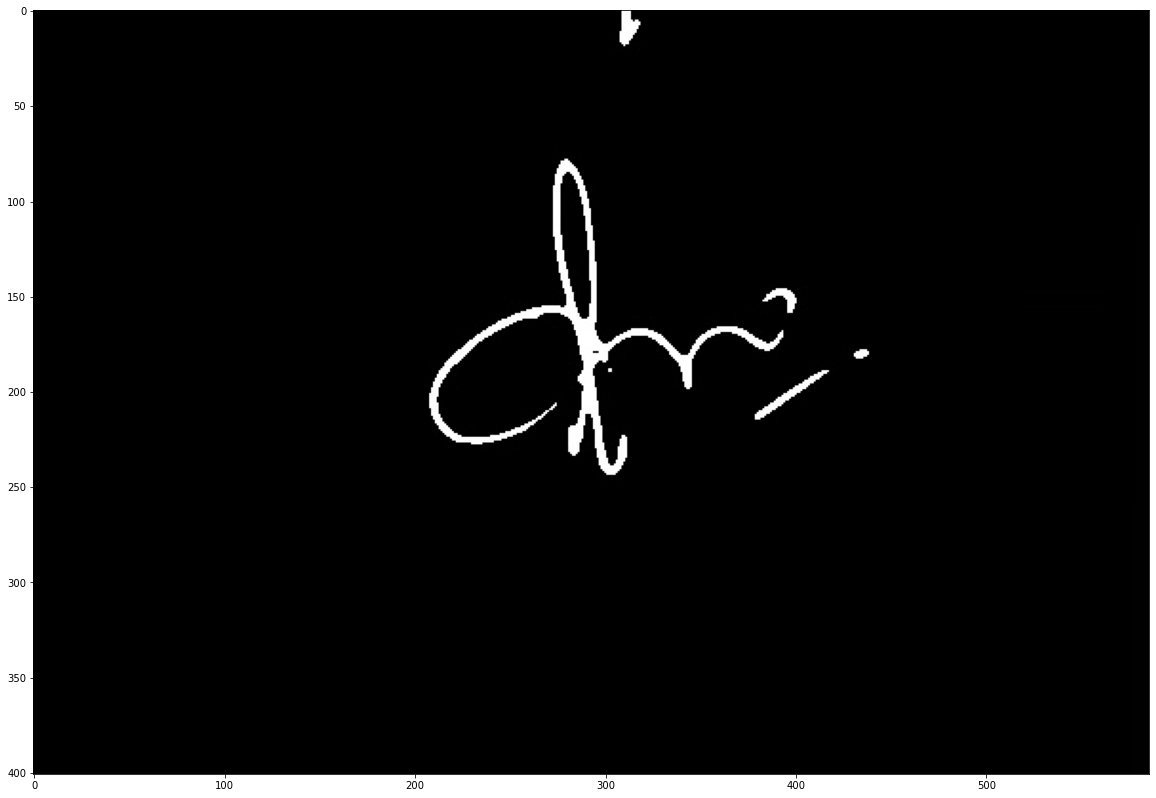

In [1098]:
display_img_gray(sig3)

In [1099]:
sig3 = cv2.resize(sig3, (150,150),interpolation=cv2.INTER_NEAREST)

In [1100]:
sig3=tf.expand_dims(sig3, axis=0)

In [1103]:
sm.predict([sig1,sig3])>0.65

array([[False]])

Improving the decision-making process for banks and our platform

In [358]:
def plot_categorical_count(df, col, hue=None, hue_order=None, is_pct=True, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    #Show value counts for two categorical variables and using hue parameter:
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), va='bottom', ha='center', size=14)
     #removing top and right borders   
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)
     #Show the plot
    plt.show()
    
    if is_pct:
        print()
        print("Percentage share of each category:")
        print(df[col].value_counts(normalize=True)*100)

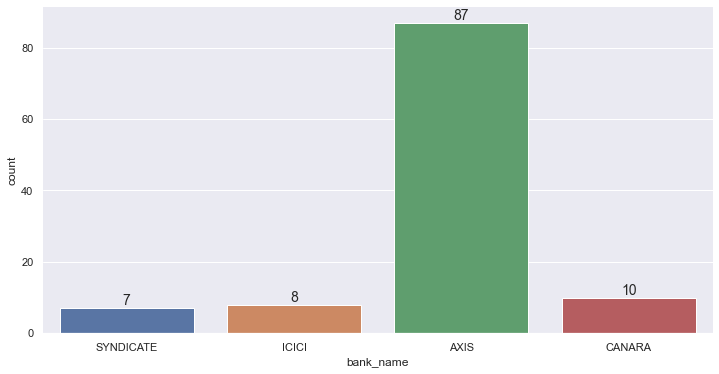


Percentage share of each category:
AXIS         77.678571
CANARA        8.928571
ICICI         7.142857
SYNDICATE     6.250000
Name: bank_name, dtype: float64


In [359]:
plot_categorical_count(df, 'bank_name')

In [374]:
df2 = pd.DataFrame([["911010049001545","Rowata Rej ib Kummer","ThreeCashy Sly Thousand","00030914880 50021101205 42616080 31","25002006","1500001","AXIS",0],["911010049001545","Rowata Rej ib Kummer","ThreeCashy Sly Thousand","00030914880 50021101205 42616080 31","25002006","1500001","SYNDICATE",0],["630801551452","Rowata Rej ib Kummer","ThreeCashy Sly Thousand","00010083180 50022900905 55145280 31","25002006","1500001","ICICI",0]], columns=['NUM_AC','NOM','MONTANT_letter','MICR','DATE','montant_chiffre','bank_name','valide'])
df=df.append(df2, ignore_index = True)

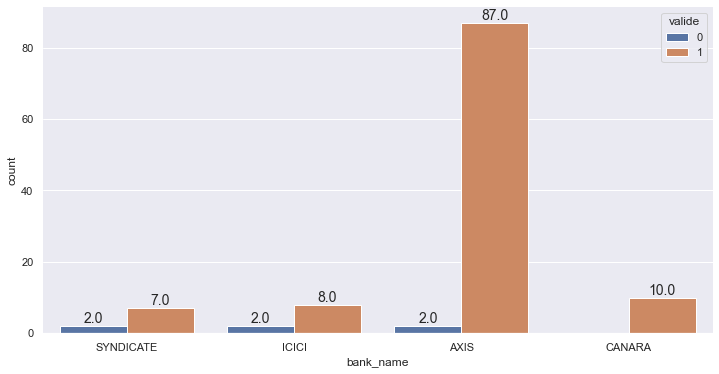

In [395]:
plot_categorical_count(df, col='bank_name', hue='valide', is_pct=False)

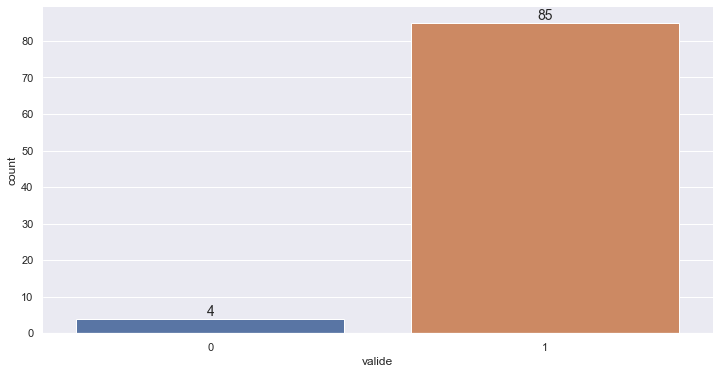

In [394]:
NUM_ACOUNT='911010049001545'
df_plot = df[df['NUM_AC'].str.startswith(NUM_ACOUNT)]
plot_categorical_count(df_plot, col='valide', is_pct=False)

In [389]:
df['City_Code'] = df.apply(lambda row: str(row.MICR).split()[1][0:3], axis=1)

In [390]:
df['BANK_Code'] = df.apply(lambda row: str(row.MICR).split()[1][3:6], axis=1)

In [391]:
df['BRANCH_Code'] = df.apply(lambda row: str(row.MICR).split()[1][6:9], axis=1)

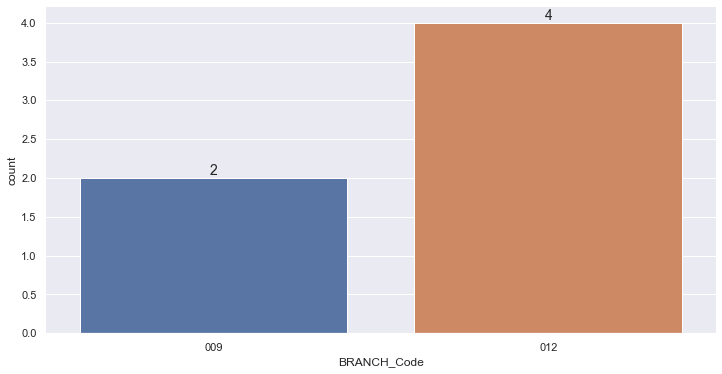

In [392]:
df_plot_1 = df[df['valide']==0]
plot_categorical_count(df_plot_1, col='BRANCH_Code', is_pct=False)

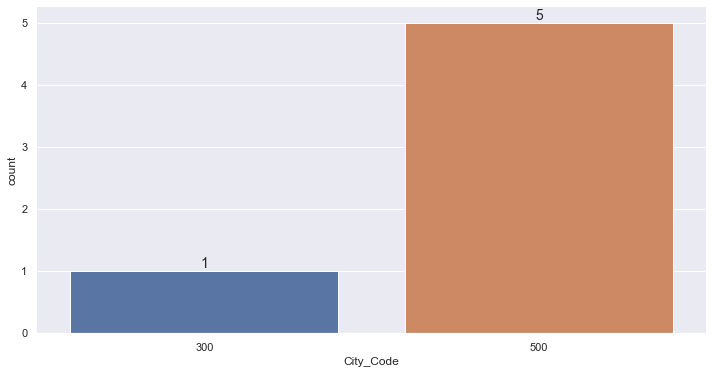

In [393]:
df_plot_1 = df[df['valide']==0]
plot_categorical_count(df_plot_1, col='City_Code', is_pct=False)

### we tried to use nanonets api for OCR .we get better results than tesseract but it's a paid service 

In [254]:
import requests

url = 'https://app.nanonets.com/api/v2/OCR/Model/fdcc9249-09f9-414f-95cf-d9bbcb871279/LabelFile/'
for i in range(len(NAME)):
    data = {'file': open(f'C:/Users/ASUS/OneDrive/Bureau/IDRBT_Cheque_Image_Dataset/NAME_ONLY/{i}.jpeg', 'rb')}

    response = requests.post(url, auth=requests.auth.HTTPBasicAuth('idpy-B0CusUDdqnMov3o6fpOmNROlsvM', ''), files=data)

    print(response.text)

{"message":"Success","result":[{"message":"Success","input":"0.jpeg","prediction":[{"id":"6e24d6c9-4693-4b7b-bcec-fbb03575d619","label":"bb","xmin":250,"ymin":-8,"xmax":1220,"ymax":173,"score":0.9624298,"ocr_text":"DadabaDo Pradefo kumar"}],"page":0,"request_file_id":"28e1497a-b944-48bf-8f93-21365227278e","filepath":"uploadedfiles/fdcc9249-09f9-414f-95cf-d9bbcb871279/PredictionImages/1984210061.jpeg","id":"4d82a743-aec4-11ec-a537-2ab5c3ca2b50","rotation":0}],"signed_urls":{"uploadedfiles/fdcc9249-09f9-414f-95cf-d9bbcb871279/PredictionImages/1984210061.jpeg":{"original":"https://nnts.imgix.net/uploadedfiles/fdcc9249-09f9-414f-95cf-d9bbcb871279/PredictionImages/1984210061.jpeg?expires=1648506270\u0026or=0\u0026s=20bf1e8dcb5ea58cb8e9ef439b3b26a8","original_compressed":"https://nnts.imgix.net/uploadedfiles/fdcc9249-09f9-414f-95cf-d9bbcb871279/PredictionImages/1984210061.jpeg?auto=compress\u0026expires=1648506270\u0026or=0\u0026s=7a0fd2f9502e6001f8fd264979b3a669","thumbnail":"https://nnts.i